<a href="https://colab.research.google.com/github/Harsh-D-7/Data-Mining/blob/main/Experiment_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.	Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


2.	Load Dataset

In [2]:
# Load the dataset from a publicly available URL
data = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')


3.	Preprocessing

In [3]:
# Standardize 'Amount'
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# Drop 'Time' column
data = data.drop(['Time'], axis=1)


4.	Feature and Target Separation

In [4]:
X = data.drop('Class', axis=1)
y = data['Class']


5.	Apply Isolation Forest

In [5]:
isoforest = IsolationForest(contamination=0.001, random_state=42)
y_pred = isoforest.fit_predict(X)

# Convert predictions: -1 (outlier/fraud), 1 (normal) → 1 (fraud), 0 (normal)
y_pred = [1 if val == -1 else 0 for val in y_pred]


6.	Evaluate Model

In [6]:
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y, y_pred, target_names=["Legit", "Fraud"]))


Confusion Matrix:
 [[284135    180]
 [   387    105]]

Classification Report:
               precision    recall  f1-score   support

       Legit       1.00      1.00      1.00    284315
       Fraud       0.37      0.21      0.27       492

    accuracy                           1.00    284807
   macro avg       0.68      0.61      0.63    284807
weighted avg       1.00      1.00      1.00    284807



7.	Visualize Confusion Matrix

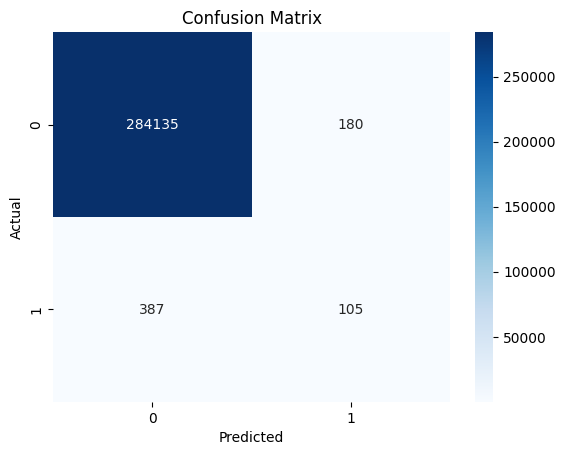

In [7]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
